# The Titanic Report

The main question is: What factors made people more likely to survive?

### Other questions ###

 **Q1** How many persons survived the Titanic?
 
 **Q2** Which gender survived with a higher count, Male or Female?
 
 **Q3** Which P class had the most survivors?
 
 **Q4** Which age group survived ?
 
 
(These questions are going to be addressed during the report: A1, A2, A3, and A4)

We start by importing libraries:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

**FIRST CHECK OF THE DATA**

In [2]:
titanic = pd.read_csv('titanic-data.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**CLEANING UP DATA**

There are 891 entries for each parameter but for: **Age**, **Cabin**, and **Embarked**.
We need to fill those values.

**Age** can be important so we need to fill 177 missing values. One way could be using the median, other could be using the median or the mean.

In [5]:
titanic['Age'].mean()

29.69911764705882

In [6]:
titanic['Age'].median()

28.0

Let's see if there is a large difference between mean female and male to consider two different means (depending on sex) when filling age

In [7]:
age_mean_female=titanic[titanic['Sex'].str.contains("female")]['Age'].mean()
print age_mean_female

27.9157088123


In [8]:
age_mean_male=titanic[titanic['Sex'].str.contains("male")]['Age'].mean()
print age_mean_male

29.6991176471


There is no large difference so we will consider the general mean for our missing age values

In [9]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Now we filled all missing **Age** entries with mean values.

Let's see now the embarked parameter (we have two missing values)

In [11]:
embarqued=titanic['Embarked'].value_counts()
print embarqued

S    644
C    168
Q     77
Name: Embarked, dtype: int64


The most commomn is S. So we will fill the missing values with S

In [12]:
titanic['Embarked'].fillna('S', inplace=True)

Let's check...

In [13]:
embarqued2=titanic['Embarked'].value_counts()
print embarqued2

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


At this point, I do not believe the name of the Cabin is going to be a decissive parameter for survival. The location for sure though.

**ANALYSIS OF DATA**

I believe the most important parameters that can decide if a person survive or not are: **sex**,**age**,**fare**,**Pclass**. So let's make some tables and plots

In [15]:
survived=titanic['Survived'].value_counts()
survived.index = ['Dead','Survived']
print survived

Dead        549
Survived    342
Name: Survived, dtype: int64


**A1:** 549 dead and 342 survived. The ratio for surviving was: 36.7%

In [16]:
survived_sex=titanic[titanic['Survived']==1]['Sex'].value_counts()
died_sex=titanic[titanic['Survived']==0]['Sex'].value_counts()
table1 = pd.DataFrame([survived_sex,died_sex])
table1.index = ['Survived','Dead']
print table1

          female  male
Survived     233   109
Dead          81   468


Other way to do that. Thanks to my reviewer.

In [24]:
a=pd.crosstab(titanic['Sex'],titanic['Survived'])
a.columns=['Dead','Survived']
print a

        Dead  Survived
Sex                   
female    81       233
male     468       109


**A2:** **Female**: 74% survived **Male**: 19% survived.
This is an important factor to take into account

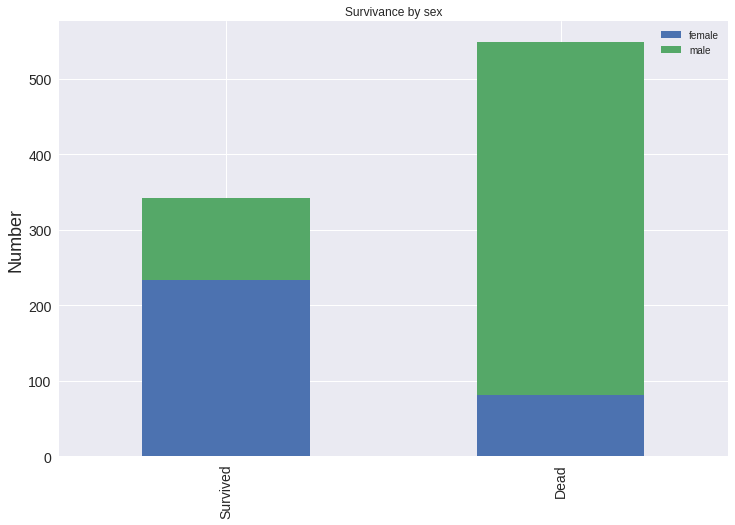

In [25]:
tab=table1.plot.bar(stacked=True, fontsize=14,title='Survivance by sex', figsize=(12,8))
tab.set_ylabel("Number",fontsize=18)


#table1.xlabel('Age')
#table1.ylabel('Number of passengers')

Let's see how 'Embarked' influences the survival

In [26]:
survived_embarked=titanic[titanic['Survived']==1]['Embarked'].value_counts()
died_embarked=titanic[titanic['Survived']==0]['Embarked'].value_counts()
table2 = pd.DataFrame([survived_embarked,died_embarked])
table2.index = ['Survived','Dead']
print table2

            S   C   Q
Survived  219  93  30
Dead      427  75  47


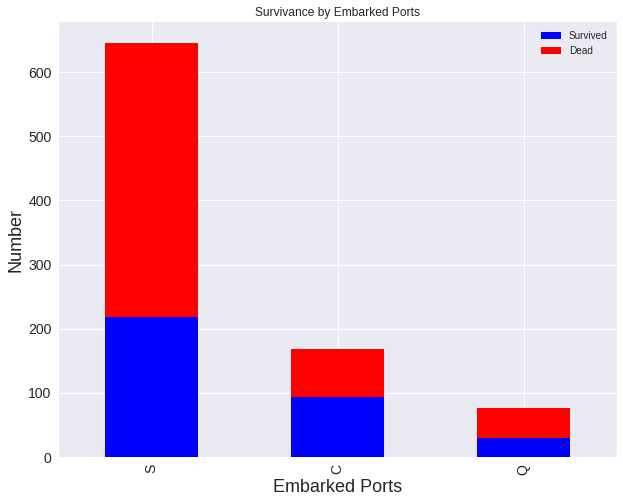

In [27]:
table2b = table2.transpose()
tab2=table2b.plot(kind='bar',stacked=True, title='Survivance by Embarked Ports', fontsize=14, figsize=(10,8), color = ['b','r'])
tab2.set_ylabel("Number",fontsize=18)
tab2.set_xlabel("Embarked Ports",fontsize=18)


Survived from S: 34%, from C:55%, from Q: 39%. Those embarked in port C had more chances to survive

Let's see now how 'class' influences the survival

In [28]:
survived_class=titanic[titanic['Survived']==1]['Pclass'].value_counts()
died_class=titanic[titanic['Survived']==0]['Pclass'].value_counts()
table3 = pd.DataFrame([survived_class,died_class])
table3.index = ['Survived','Dead']
table3b = table3.transpose()
print table3b

   Survived  Dead
1       136    80
2        87    97
3       119   372


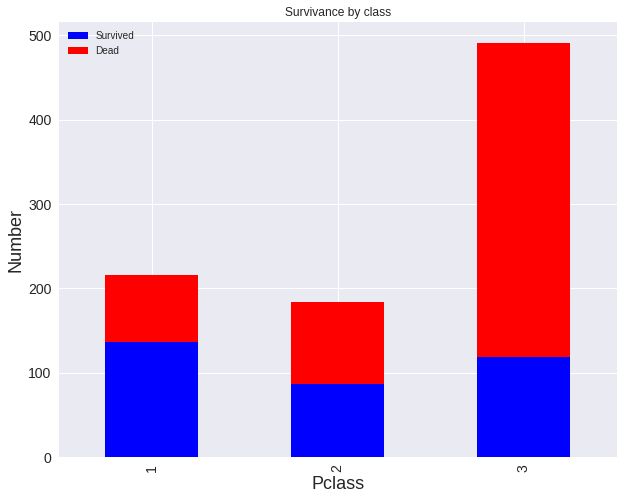

In [29]:
tab3=table3b.plot(kind='bar',stacked=True, title='Survivance by class', fontsize=14, figsize=(10,8), color = ['b','r'])
tab3.set_ylabel("Number",fontsize=18)
tab3.set_xlabel("Pclass",fontsize=18)

By class. Survided 63% from class 1; 47% from class 2 and 23% from class 3. Class definetly has an important role in the survivance.

**A3:** Most survivors are from Pclass 1

Is 'Age' an important factor? Let's see:

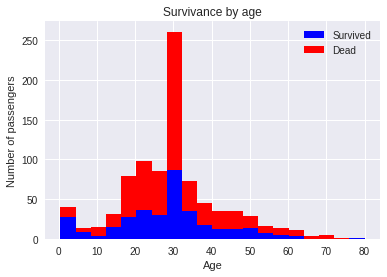

In [30]:
plt.hist([titanic[titanic['Survived']==1]['Age'], titanic[titanic['Survived']==0]['Age']], stacked=True, 
         bins = 20,label = ['Survived','Dead'],color = ['b','r'])
plt.title('Survivance by age')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
#plt.axis([0, 10, 0, 30])

**A4**: Children below age of 8 are more likely to survive (but those who were 2 years old). Let's make a zoom:

[0, 10, 0, 30]

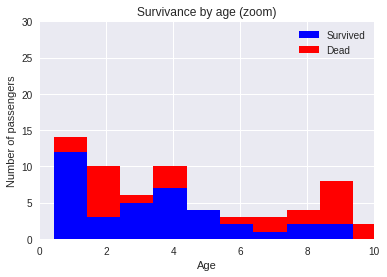

In [31]:
plt.hist([titanic[titanic['Survived']==1]['Age'], titanic[titanic['Survived']==0]['Age']], stacked=True, 
         bins = 80,label = ['Survived','Dead'],color = ['b','r'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Survivance by age (zoom)')
plt.legend()
plt.axis([0, 10, 0, 30])

Interestingly all 4 children with age of 5 survived

What about the price of the ticket? (Fare)

[0, 300, 0, 500]

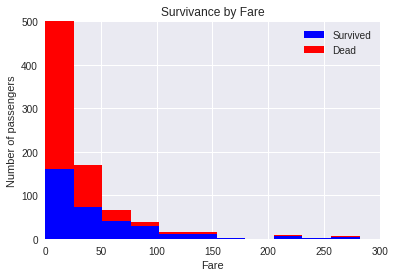

In [32]:
plt.hist([titanic[titanic['Survived']==1]['Fare'], titanic[titanic['Survived']==0]['Fare']], stacked=True, 
         bins = 20,label = ['Survived','Dead'],color = ['b','r'])
plt.xlabel('Fare')
plt.title('Survivance by Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.axis([0, 300, 0, 500])

Those who paid more 50 had more than 50% of chances to survive

Summarizing: Female, from class 1, expensive tickets, younger (8 years or youger) and embarked in port C are more likely to survive. Female: 74%, class1: 63%, younger than 8%: > 50%, port C: 55%

Let's make a test. We are gouping now the passengers by the more probably parameters to survive: Female, Pclass, fare, age, and port. Then check if survive = 1 is the most common value. 

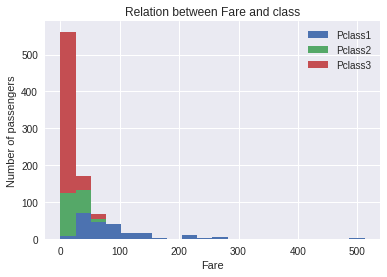

In [36]:
plt.hist([titanic[titanic['Pclass']==1]['Fare'],titanic[titanic['Pclass']==2]['Fare'],titanic[titanic['Pclass']==3]['Fare']], stacked=True, bins = 20, label = ['Pclass1','Pclass2','Pclass3'])
plt.xlabel('Fare')
plt.title('Relation between Fare and class')
plt.ylabel('Number of passengers')
plt.legend()

- There is a clear correlation between Pclass and price of the ticket (Fare). Pclass1 paid more for the ticket than other classes. Pclass1 was the cheapest class.

Let's make a final table. After playing a little I found that woman from Pclass 1 had the highest chance to survive

In [37]:
surv=titanic[(titanic['Survived']==1) & (titanic['Pclass']==1) & (titanic['Age']<100)]['Sex'].value_counts()
died=titanic[(titanic['Survived']==0) & (titanic['Pclass']==1) & (titanic['Age']<100)]['Sex'].value_counts()
surv2=100*surv/(surv+died)
died2=100*died/(surv+died)
table5 = pd.DataFrame([surv,died])
table5.index = ['Survived','Dead']
table5bis = pd.DataFrame([surv2,died2])
table5bis.index = ['Survived(%)','Dead(%)']
print table5
print '******************'
print table5bis

                                     
#survived_sex=titanic[titanic['Survived']==1]['Sex'].value_counts()

          female  male
Survived      91    45
Dead           3    77
******************
                female       male
Survived(%)  96.808511  36.885246
Dead(%)       3.191489  63.114754


Yes! 96.8% of female from class1 survive!!

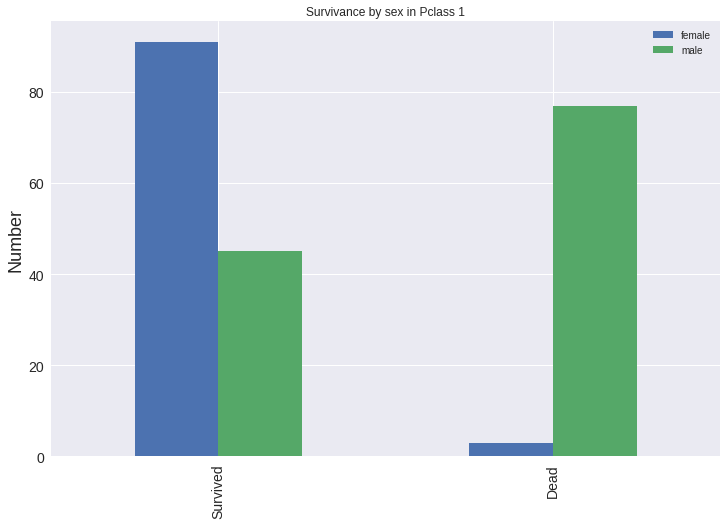

In [38]:
tab5=table5.plot.bar(stacked=False, fontsize=14,title='Survivance by sex in Pclass 1', figsize=(12,8))
tab5.set_ylabel("Number",fontsize=18)


## Conclusion

- Only 36.7% (out of 891 in the data) survive to the titanic disaster.
- From those that survive, 68% were female.
- Passenger with less than 8 years were more likely to survive.
- Pclass 1 was the class with more chances to survive.
- Thoose who paid highest Fares had more chances to survive. Actually there is a clear relation between Class and Fare.
- Putting altogether: **Young females who paid a high price for the ticket had the highest chances to survive**

### Limitations

- We only have part of the passengers. Would be good to have the entire population. At least to check if our results can be extrapolable.
- I still have some limitations to represent exactly what I want. Sort columns and show data. However, this is a matter of time and practice. 
- I have learn a lot doing this and I will excited to continue working on the course.

#### comments

- I have mainly used this webpage: https://pandas.pydata.org